In [80]:
# Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp, ttest_ind, ttest_ind_from_stats #T-test for independent samples
from scipy.stats import chi2,chisquare,chi2_contingency #Chi-square test of independence
from scipy.stats import lognorm,norm, t,pearsonr,spearmanr 
from scipy.stats import f_oneway #One-way ANOVA
from scipy.stats import shapiro #Shapiro-Wilk’s test for Normality
from scipy.stats import levene #Levene's test for Equality of Variance

from statsmodels.graphics.gofplots import qqplot, qqplot_2samples

import warnings
warnings.filterwarnings("ignore")

In [62]:
#Loading the data
df = pd.read_csv(r"C:\Users\VIRAJ\Downloads\bike_sharing.txt")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Problem Statement

### Which variables are significant in predicting the demand for shared electric cycles in the Indian market and how well those variables describe the electric cycle demands

## Analyzing basic metrics

In [7]:
df.shape #The dataset has 10886 rows and 12 columns

(10886, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
#Checking data types of each column

df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [10]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [6]:
# Checking duplicate rows 
duplidate_rows = df[df.duplicated()]
print("No. of duplicate rows:", duplidate_rows.shape[0])

No. of duplicate rows: 0


In [11]:
#Checking Stastical summary of the data

df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
df.describe(include=object)

,datetime
count,10886
unique,10886
top,2012-11-11 19:00:00
freq,1


## Non-Graphical Analysis: Value counts and unique attributes

In [17]:
df.groupby('windspeed')['count'].nunique()

#Count is highest when the windspeed to zero and it decreases gradually when the windspeed decreases.

windspeed
0.0000     446
6.0032     360
7.0015     397
8.9981     440
11.0014    456
12.9980    460
15.0013    450
16.9979    424
19.0012    387
19.9995    322
22.0028    235
23.9994    205
26.0027    184
27.9993    158
30.0026     97
31.0009     81
32.9975     73
35.0008     53
36.9974     21
39.0007     27
40.9973     10
43.0006     12
43.9989      8
46.0022      3
47.9988      2
50.0021      1
51.9987      1
56.9969      2
Name: count, dtype: int64

In [3]:
def dist_check(df, col_name):
  print("Unique values =", df[col_name].unique())
  print("Value counts :")
  print(df[col_name].value_counts())

In [4]:
column_list = ['holiday','weather', 'season','workingday']
for col in column_list: 
  print(col, "-")
  dist_check(df, col)
  print("\n")

holiday -
Unique values = [0 1]
Value counts :
0    10575
1      311
Name: holiday, dtype: int64


weather -
Unique values = [1 2 3 4]
Value counts :
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


season -
Unique values = [1 2 3 4]
Value counts :
4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64


workingday -
Unique values = [0 1]
Value counts :
1    7412
0    3474
Name: workingday, dtype: int64




## Visual Analysis - Univariate & Bivariate

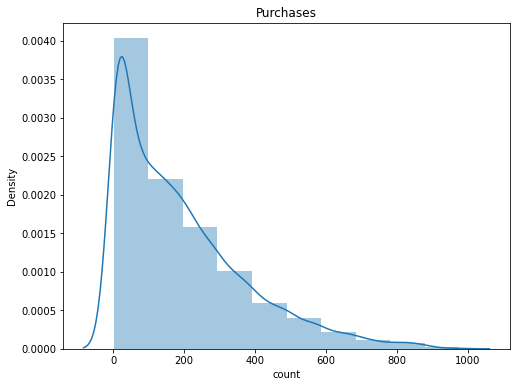

In [9]:
#Distribution of count column

fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df['count'],bins=10,ax=ax)
plt.title("Purchases")
plt.show()

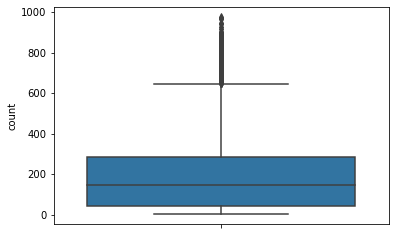

In [14]:
#Checking outliers in Count column via Boxplot

sns.boxplot(y=df['count'])
plt.show()

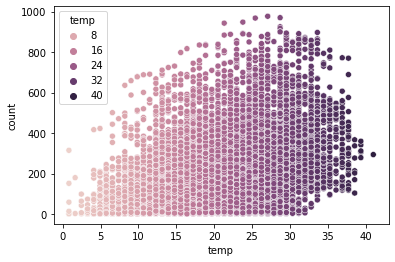

In [29]:
sns.scatterplot(x='temp', y='count', data=df, hue='temp',sizes=(30, 200), legend='brief')

#The sales seems to be ideal when the temperature is between 25 and 35 and low above 38 and below 20

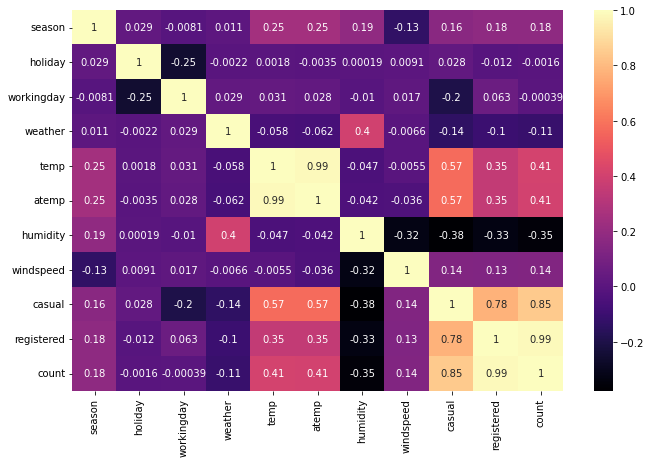

In [7]:
# Correlation Heatmap 

plt.figure(figsize=(11, 7))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='magma')
plt.show()

#temperature and aparent temprature seems to be highly correlated
#casual, atemp and registered are highly correlated columns  

## Detecting Outliers

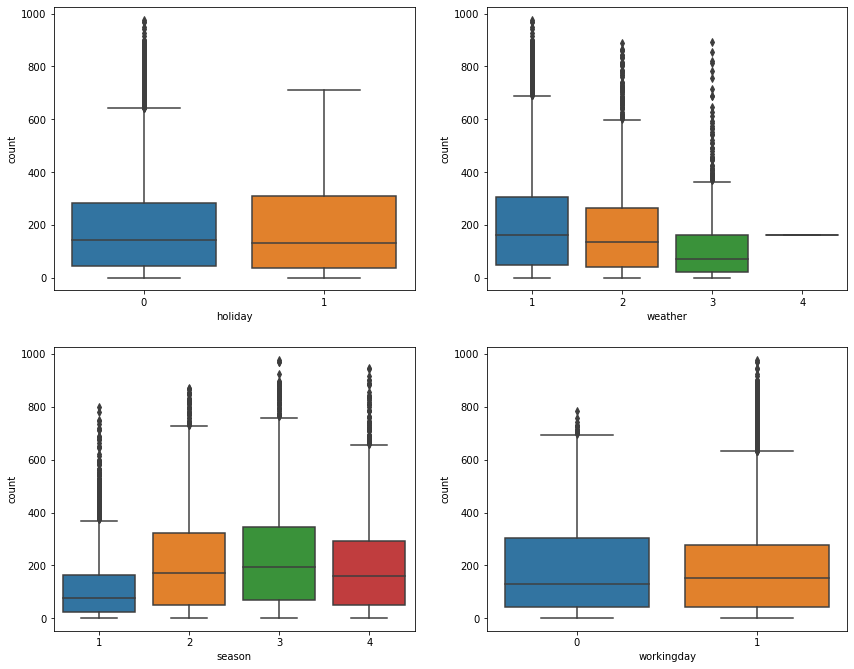

In [8]:
#Using Boxplot method


fig = plt.figure(figsize=(7, 24))
fig.subplots_adjust(right=1.7)

for x in range(1, len(column_list)+1):
    plt.subplot(4,2,x)
    sns.boxplot(x=df[column_list[x-1]], y=df['count'])

plt.show()

## Dealing with outliers

In [ ]:
#We will apply a log transformation to reduce the effect of outliers in the data

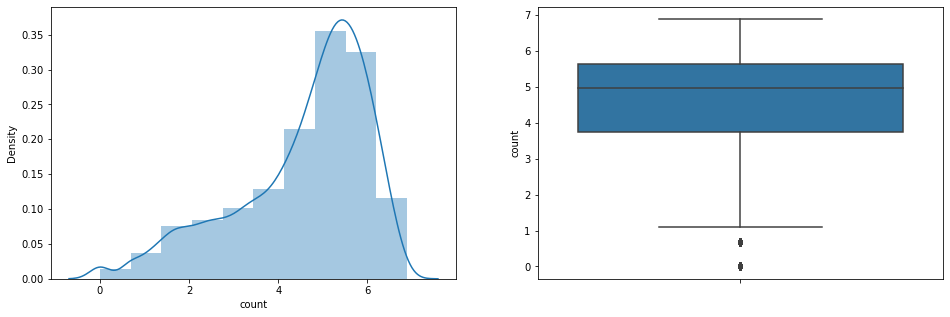

In [21]:
plt.figure(figsize=(16,5))
    
plt.subplot(1, 2, 1)
sns.distplot(np.log(df['count']), bins=10)

plt.subplot(1, 2, 2)
sns.boxplot(y=np.log(df['count']))

plt.show()

## Hypothesis Testing

### 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

In [46]:
df_working_Day = df[df['workingday'] == 1]["count"].sample(2999)
df_Nonworking_Day = df[df['workingday'] == 0]["count"].sample(2999)

#While performing hypothesis we usually take equal number of samples as unequal number of samples may affect the statistical
#power of the test

In [47]:
alpha = 0.05 #We will test at alpha=0.05 significance level

test_stat,p_value = ttest_ind(df_working_Day,df_Nonworking_Day,equal_var=False,alternative="less")
#print(test_stat)
print('The p-value is : ', p_value)

if p_value < alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")
    
#Here we can infer that Working Day has an effect on the number of electric cycles rented

The p-value is :  0.5885253531908367
Failed to reject H0


Insight: Since p-value is greater than alpha, we fail to reject the null hypothesis. Thus we have statistical evidence that  average number of bike rides during weekdays is greater than or equal to those on weekends.

## ANNOVA test to check if No. of cycles rented is similar or different in different weather

Before applying ANNOVA test we will use Shapiro test to check if the data follows Gaussian distribution or not.

Ho - Null Hypothesis - Data is Gaussian i.e., data follows normal distribution 

Ha - Alternate Hypothesis - Data is not gaussian i.e., data doesn't follow normal distribution

In [71]:
w1 = df[df['weather'] == 1]['count'].sample(850)
w2 = df[df['weather'] == 2]['count'].sample(850)
w3 = df[df['weather'] == 3]['count'].sample(850)
w4 = df[df['weather'] == 4]['count']

In [72]:
df.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


One-way ANOVA test can be used here if normality and equality of variance assumptions are verified.

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test for checking normality

In [74]:
#Normality test

alpha = 0.05 #We will test at alpha=0.05 significance level
w, p_value = shapiro(df['count'].sample(5999)) 
print('The p-value is: ',p_value)

if p_value < alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")

The p-value is:  0.0
Reject H0


#### Levene's  test  for checking variance

Ho - Null Hypothesis - All the count variances are equal

Ha - Alternate Hypothesis - At least one variance is different

In [70]:
#Homogeneity of Variance test 

alpha = 0.05 #We will test at alpha=0.05 significance level
stat, p_value = levene(w1, w2, w3)
print('The p-value is : ', p_value)

if p_value < alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")

The p-value is :  8.665504589507267e-20
Reject H0


#### Using a Q-Q plot for checking normality

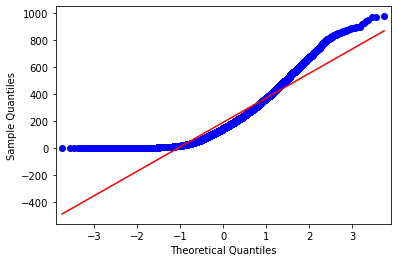

In [85]:
qqplot(df['count'], line='s')
plt.show()

#The linearity of points suggests that the data is normally distributed.

#### Checking homogeneity of Variance

In [88]:
print(w1.var(), w2.var(), w3.var())

36126.99242569112 25693.32834476548 19351.372072334212


In [91]:
test_stat, p_value = f_oneway(w1, w2, w3)
print('The p-value is : ', p_value)

if p_value < alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")

The p-value is :  9.45764503624811e-25
Reject H0


## ANNOVA test to check if No. of cycles rented is similar or different in different season

In [94]:
season1 = df[df['season'] == 1]['count'].sample(2500)
season2 = df[df['season'] == 2]['count'].sample(2500)
season3 = df[df['season'] == 3]['count'].sample(2500)
season4 = df[df['season'] == 4]['count'].sample(2500)

In [95]:
df.groupby(['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [98]:
alpha = 0.05 #We will test at alpha=0.05 significance level

test_stat, p_value = f_oneway(s1, s2, s3, s4)
print('The p-value is:', p_value)

if p_value < alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")

The p-value is: 8.948959768332857e-143
Reject H0


## Chi-square test to check if Weather is dependent on the season

In [100]:
weather_season = pd.crosstab(index=df["weather"],columns=df["season"])
weather_season

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [101]:
test_stat,p_value,df,exp_freq = chi2_contingency(weather_season)

In [102]:
test_stat,p_value,df,exp_freq

(49.15865559689363,
 1.5499250736864862e-07,
 9,
 array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
        [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
        [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
        [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

In [103]:
alpha = 0.05 #We will test at alpha=0.05 significance level

if p_value < alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")
    
#Thus we can say that Weather is dependent on the Season

Reject H0


## Insights

#### 1) We see that there is a difference in the number of bikes rented in different seasons

#### 2) There is a difference in the number of bikes rented on weekdays v/s number of bikes rented on weekends/holidays

#### 3) Similar to different seasons we can infer that the no. of rented bikes is depending on the weather conditions

#### 4) Chi-squared analysis gave us the insight that weather is dependent on the season

#### 5) The number of cycles rented in clear conditions is greater than other weather conditions

## Recommendations

#### 1) The number of bikes rented on weekends/holidays is very less compared to weekdays. Yulu should offer special discounts or must roll out sum offers to increase the sales on weekends

#### 2) There are higher chances of bikes being rented during weather 1

#### 3) For first time users Yulu can try to offer huge discounts on first ride so that give positive feedback and this may increase the overall sales

#### 4) On rainy days Yulu can try to provide extra accessories like protective gears which may increase the safet of the ride and thus more people might opt this even on rainy days